## Figure 15 (Journal of Climate submission; Molina et al.)

Fig. 15. DJF mean vertical temperature anomalies ($^{\circ}$C) to a depth of 285 meters across the tropical Pacific during (a-f) El Nino (ONI $\geq$ +0.5) and (g-l) La Nina (ONI $\leq$ -0.5) for the CESM1 control and sensitivity experiments. Dashed lines represent 20$^{\circ}$C (black), 15$^{\circ}$C (dark grey), and 12$^{\circ}$C (grey) isotherms. Time periods considered are the same as in Fig. 2.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports 
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from climatico import enso
from datetime import timedelta

In [2]:
from config import directory_figs, directory_data

In [3]:
def pop_lon_indx():
    """
    Extract mask for the pacific slab region. Mask contains ones and nans.
    """
    for_lon = xr.open_dataset(f'{directory_data}b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.000101-005012.nc')
    mask = for_lon['SST'].where((for_lon['TLAT']<10) & (for_lon['TLAT']>-10) & (for_lon['TLONG']>160) & (for_lon['TLONG']<-80+360), 
                                 drop=False).isel(z_t=0, time=0).values
    return np.where(np.isnan(mask), np.nan, 1)

def compute_iso(threedim_array, mask):
    """
    Create array of depth of isotherm using 3d iso array and 2d mask.
    Args:
        threedim_array (numpy array): Isotherm values.
        mask (numpy array): Mask from pop_lon_indx.
    Returns:
        One dimensional array across Pacific slab region.
    """
    newmask = np.nanmean(np.nanmean(threedim_array[:,:,:] * mask[np.newaxis,:,:], axis=0), axis=0) * 0.01
    return newmask[~np.isnan(newmask)]

In [4]:
nino = xr.open_dataset(f'{directory_data}ensoslabs_ninodata.nc')
nina = xr.open_dataset(f'{directory_data}ensoslabs_ninadata.nc')
clim = xr.open_dataset(f'{directory_data}ensoslabs_climodata.nc')
nino_iso20 = xr.open_dataset(f'{directory_data}ninoslabs_DEPTH_OF_20C.nc')
nina_iso20 = xr.open_dataset(f'{directory_data}ninaslabs_DEPTH_OF_20C.nc')
nino_iso15 = xr.open_dataset(f'{directory_data}ninoslabs_DEPTH_OF_15C.nc')
nina_iso15 = xr.open_dataset(f'{directory_data}ninaslabs_DEPTH_OF_15C.nc')
nino_iso12 = xr.open_dataset(f'{directory_data}ninoslabs_DEPTH_OF_12C.nc')
nina_iso12 = xr.open_dataset(f'{directory_data}ninaslabs_DEPTH_OF_12C.nc')

In [5]:
# labels
est_lons = nino['TLONG'].mean(dim=['nlat'], skipna=True).values-360
depth    = nino.coords['z_t'].values

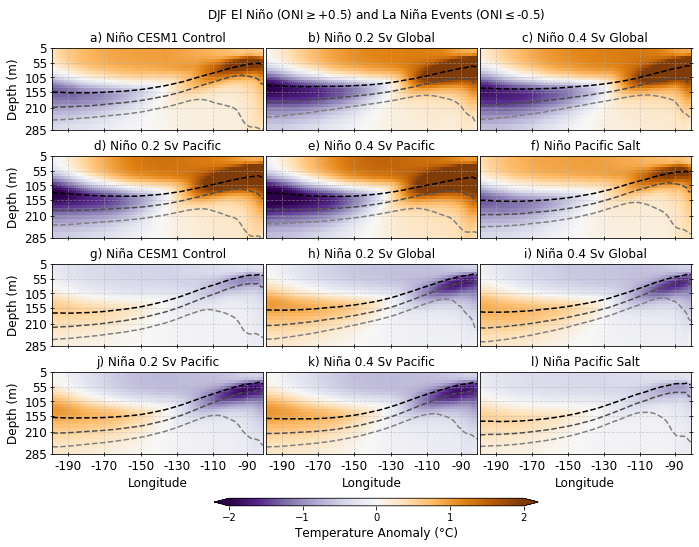

In [6]:
# --------------

a = u"\u00b0"
fig = plt.figure(figsize=(9,6))
fig.suptitle(u'DJF El Niño (ONI$\geq$+0.5) and La Niña Events (ONI$\leq$-0.5)', x=0.5, y=1.035, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 0.325, 0.19])

ax1.set_title('a) Niño CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(est_lons, depth*0.01, nino['cntrl_nino'].values-clim['cntrl_climo'].values, 
                     cmap='PuOr_r', vmin=-2., vmax=2., shading='auto')

ax1.plot(est_lons, nino_iso20['cntrl_nino'].values, c='k', lw=1.5, ls='--')
ax1.plot(est_lons, nino_iso15['cntrl_nino'].values, c='0.3', lw=1.5, ls='--')
ax1.plot(est_lons, nino_iso12['cntrl_nino'].values, c='0.5', lw=1.5, ls='--')

ax1.set_yticks(depth[::5] * 0.01)
ax1.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax1.set_xticks(est_lons[[8,26,44,62,80,97]])
ax1.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax1.set_ylabel('Depth (m)', fontsize=12)

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())
ax1.grid(alpha=0.5, ls='--')

# --------------

ax2 = plt.axes([0.33, 0.75, 0.325, 0.19])

ax2.set_title('b) Niño 0.2 Sv Global', fontsize=12)

cs2 = ax2.pcolormesh(est_lons, depth*0.01, nino['g02sv_nino'].values-clim['g02sv_climo'].values, 
                     cmap='PuOr_r', vmin=-2, vmax=2, shading='auto')

ax2.plot(est_lons, nino_iso20['g02sv_nino'].values, c='k', lw=1.5, ls='--')
ax2.plot(est_lons, nino_iso15['g02sv_nino'].values, c='0.3', lw=1.5, ls='--')
ax2.plot(est_lons, nino_iso12['g02sv_nino'].values, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax2.set_yticks(depth[::5] * 0.01)
ax2.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax2.set_xticks(est_lons[[8,26,44,62,80,97]])
ax2.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax2.grid(alpha=0.5, ls='--')

# --------------

ax3 = plt.axes([0.66, 0.75, 0.325, 0.19])

ax3.set_title('c) Niño 0.4 Sv Global', fontsize=12)

ax3.pcolormesh(est_lons, depth*0.01, nino['g04sv_nino'].values-clim['g04sv_climo'].values, 
               cmap='PuOr_r', vmin=-2, vmax=2, shading='auto')

ax3.plot(est_lons, nino_iso20['g04sv_nino'].values, c='k', lw=1.5, ls='--')
ax3.plot(est_lons, nino_iso15['g04sv_nino'].values, c='0.3', lw=1.5, ls='--')
ax3.plot(est_lons, nino_iso12['g04sv_nino'].values, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax3.set_yticks(depth[::5] * 0.01)
ax3.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax3.set_xticks(est_lons[[8,26,44,62,80,97]])
ax3.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax3.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax3.grid(alpha=0.5, ls='--')

# --------------

ax4 = plt.axes([0., 0.5, 0.325, 0.19])

ax4.set_title('d) Niño 0.2 Sv Pacific', fontsize=12)

ax4.pcolormesh(est_lons, depth*0.01, nino['p02sv_nino'].values-clim['p02sv_climo'].values, 
               cmap='PuOr_r', vmin=-2, vmax=2, shading='auto')

ax4.plot(est_lons, nino_iso20['p02sv_nino'].values, c='k', lw=1.5, ls='--')
ax4.plot(est_lons, nino_iso15['p02sv_nino'].values, c='0.3', lw=1.5, ls='--')
ax4.plot(est_lons, nino_iso12['p02sv_nino'].values, c='0.5', lw=1.5, ls='--')

ax4.set_yticks(depth[::5] * 0.01)
ax4.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax4.set_xticks(est_lons[[8,26,44,62,80,97]])
ax4.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax4.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax4.set_ylabel('Depth (m)', fontsize=12)

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())
ax4.grid(alpha=0.5, ls='--')

# --------------

ax5 = plt.axes([0.33, 0.5, 0.325, 0.19])

ax5.set_title('e) Niño 0.4 Sv Pacific', fontsize=12)

ax5.pcolormesh(est_lons, depth*0.01, nino['p04sv_nino'].values-clim['p04sv_climo'].values, 
               cmap='PuOr_r', vmin=-2, vmax=2, shading='auto')

ax5.plot(est_lons, nino_iso20['p04sv_nino'].values, c='k', lw=1.5, ls='--')
ax5.plot(est_lons, nino_iso15['p04sv_nino'].values, c='0.3', lw=1.5, ls='--')
ax5.plot(est_lons, nino_iso12['p04sv_nino'].values, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax5.set_yticks(depth[::5] * 0.01)
ax5.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax5.set_xticks(est_lons[[8,26,44,62,80,97]])
ax5.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax5.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax5.grid(alpha=0.5, ls='--')

# --------------

ax6 = plt.axes([0.66, 0.5, 0.325, 0.19])

ax6.set_title('f) Niño Pacific Salt', fontsize=12)

ax6.pcolormesh(est_lons, depth*0.01, nino['psalt_nino'].values-clim['psalt_climo'].values, 
               cmap='PuOr_r', vmin=-2, vmax=2, shading='auto')

ax6.plot(est_lons, nino_iso20['psalt_nino'].values, c='k', lw=1.5, ls='--')
ax6.plot(est_lons, nino_iso15['psalt_nino'].values, c='0.3', lw=1.5, ls='--')
ax6.plot(est_lons, nino_iso12['psalt_nino'].values, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax6.set_yticks(depth[::5] * 0.01)
ax6.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax6.set_xticks(est_lons[[8,26,44,62,80,97]])
ax6.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax6.grid(alpha=0.5, ls='--')

# --------------

ax7 = plt.axes([0., 0.25, 0.325, 0.19])

ax7.set_title('g) Niña CESM1 Control', fontsize=12)

ax7.pcolormesh(est_lons, depth*0.01, nina['cntrl_nina'].values-clim['cntrl_climo'].values, 
               cmap='PuOr_r', vmin=-2., vmax=2., shading='auto')

ax7.plot(est_lons, nina_iso20['cntrl_nina'].values, c='k', lw=1.5, ls='--')
ax7.plot(est_lons, nina_iso15['cntrl_nina'].values, c='0.3', lw=1.5, ls='--')
ax7.plot(est_lons, nina_iso12['cntrl_nina'].values, c='0.5', lw=1.5, ls='--')

ax7.set_yticks(depth[::5] * 0.01)
ax7.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax7.set_xticks(est_lons[[8,26,44,62,80,97]])
ax7.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax7.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax7.set_ylabel('Depth (m)', fontsize=12)

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())
ax7.grid(alpha=0.5, ls='--')

# --------------

ax8 = plt.axes([0.33, 0.25, 0.325, 0.19])

ax8.set_title('h) Niña 0.2 Sv Global', fontsize=12)

ax8.pcolormesh(est_lons, depth*0.01, nina['g02sv_nina'].values-clim['g02sv_climo'].values, 
               cmap='PuOr_r', vmin=-2, vmax=2, shading='auto')

ax8.plot(est_lons, nina_iso20['g02sv_nina'].values, c='k', lw=1.5, ls='--')
ax8.plot(est_lons, nina_iso15['g02sv_nina'].values, c='0.3', lw=1.5, ls='--')
ax8.plot(est_lons, nina_iso12['g02sv_nina'].values, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax8.set_yticks(depth[::5] * 0.01)
ax8.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax8.set_xticks(est_lons[[8,26,44,62,80,97]])
ax8.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax8.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax8.grid(alpha=0.5, ls='--')

# --------------

ax9 = plt.axes([0.66, 0.25, 0.325, 0.19])

ax9.set_title('i) Niña 0.4 Sv Global', fontsize=12)

ax9.pcolormesh(est_lons, depth*0.01, nina['g04sv_nina'].values-clim['g04sv_climo'].values, 
               cmap='PuOr_r', vmin=-2, vmax=2, shading='auto')

ax9.plot(est_lons, nina_iso20['g04sv_nina'].values, c='k', lw=1.5, ls='--')
ax9.plot(est_lons, nina_iso15['g04sv_nina'].values, c='0.3', lw=1.5, ls='--')
ax9.plot(est_lons, nina_iso12['g04sv_nina'].values, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax9.set_yticks(depth[::5] * 0.01)
ax9.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax9.set_xticks(est_lons[[8,26,44,62,80,97]])
ax9.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax9.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax9.grid(alpha=0.5, ls='--')

# --------------

ax10 = plt.axes([0., 0., 0.325, 0.19])

ax10.set_title('j) Niña 0.2 Sv Pacific', fontsize=12)

ax10.pcolormesh(est_lons, depth*0.01, nina['p02sv_nina'].values-clim['p02sv_climo'].values, 
                cmap='PuOr_r', vmin=-2, vmax=2, shading='auto')

ax10.plot(est_lons, nina_iso20['p02sv_nina'].values, c='k', lw=1.5, ls='--')
ax10.plot(est_lons, nina_iso15['p02sv_nina'].values, c='0.3', lw=1.5, ls='--')
ax10.plot(est_lons, nina_iso12['p02sv_nina'].values, c='0.5', lw=1.5, ls='--')

ax10.set_yticks(depth[::5] * 0.01)
ax10.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax10.set_xticks(est_lons[[8,26,44,62,80,97]])
ax10.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax10.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax10.grid(alpha=0.5, ls='--')
ax10.set_ylabel('Depth (m)', fontsize=12)
ax10.set_xlabel(u'Longitude', fontsize=12)

# --------------

ax11 = plt.axes([0.33, 0., 0.325, 0.19])

ax11.set_title('k) Niña 0.4 Sv Pacific', fontsize=12)

ax11.pcolormesh(est_lons, depth*0.01, nina['p04sv_nina'].values-clim['p04sv_climo'].values, 
                cmap='PuOr_r', vmin=-2, vmax=2, shading='auto')

ax11.plot(est_lons, nina_iso20['p04sv_nina'].values, c='k', lw=1.5, ls='--')
ax11.plot(est_lons, nina_iso15['p04sv_nina'].values, c='0.3', lw=1.5, ls='--')
ax11.plot(est_lons, nina_iso12['p04sv_nina'].values, c='0.5', lw=1.5, ls='--')

ax11.set_yticks(depth[::5] * 0.01)
ax11.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax11.set_xticks(est_lons[[8,26,44,62,80,97]])
ax11.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax11.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax11.grid(alpha=0.5, ls='--')
ax11.set_xlabel(u'Longitude', fontsize=12)

# --------------

ax12 = plt.axes([0.66, 0., 0.325, 0.19])

ax12.set_title('l) Niña Pacific Salt', fontsize=12)

ax12.pcolormesh(est_lons, depth*0.01, nina['psalt_nina'].values-clim['psalt_climo'].values, 
                cmap='PuOr_r', vmin=-2, vmax=2, shading='auto')

ax12.plot(est_lons, nina_iso20['psalt_nina'].values, c='k', lw=1.5, ls='--')
ax12.plot(est_lons, nina_iso15['psalt_nina'].values, c='0.3', lw=1.5, ls='--')
ax12.plot(est_lons, nina_iso12['psalt_nina'].values, c='0.5', lw=1.5, ls='--')

ax12.set_yticks(depth[::5] * 0.01)
ax12.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax12.set_xticks(est_lons[[8,26,44,62,80,97]])
ax12.set_xticklabels(np.array([-190, -170, -150, -130, -110, -90]), fontsize=12)
ax12.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax12.grid(alpha=0.5, ls='--')
ax12.set_xlabel(u'Longitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0.25, -0.12, 0.5, 0.0175])
ticks_1 = [-2,-1,0,1,2]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('Temperature Anomaly ('+a+'C)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig15.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig15.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------